# NetworkX로 파이썬 언어 관계도 그려보기
* 출처 : https://www.kaggle.com/jncharon/python-network-graph/notebook

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('data/stack_network_nodes.csv')
df_edges = pd.read_csv('data/stack_network_links.csv')
print(df_nodes.shape)
print(df_edges.shape)

(115, 3)
(490, 3)


In [3]:
df_nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [4]:
df_edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [5]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])

In [6]:
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

In [7]:
plt.figure(figsize=(25, 25))
options = {
    'edge_color': '#FFDEA2',
    'width' : 1,
    'with_labels' : True,
    'font_weight' : 'regular'
}
size = [G.node[node]['nodesize']*10 for node in G]

In [8]:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

In [9]:
colors = [color_map[G.node[node]['group']] for node in G]

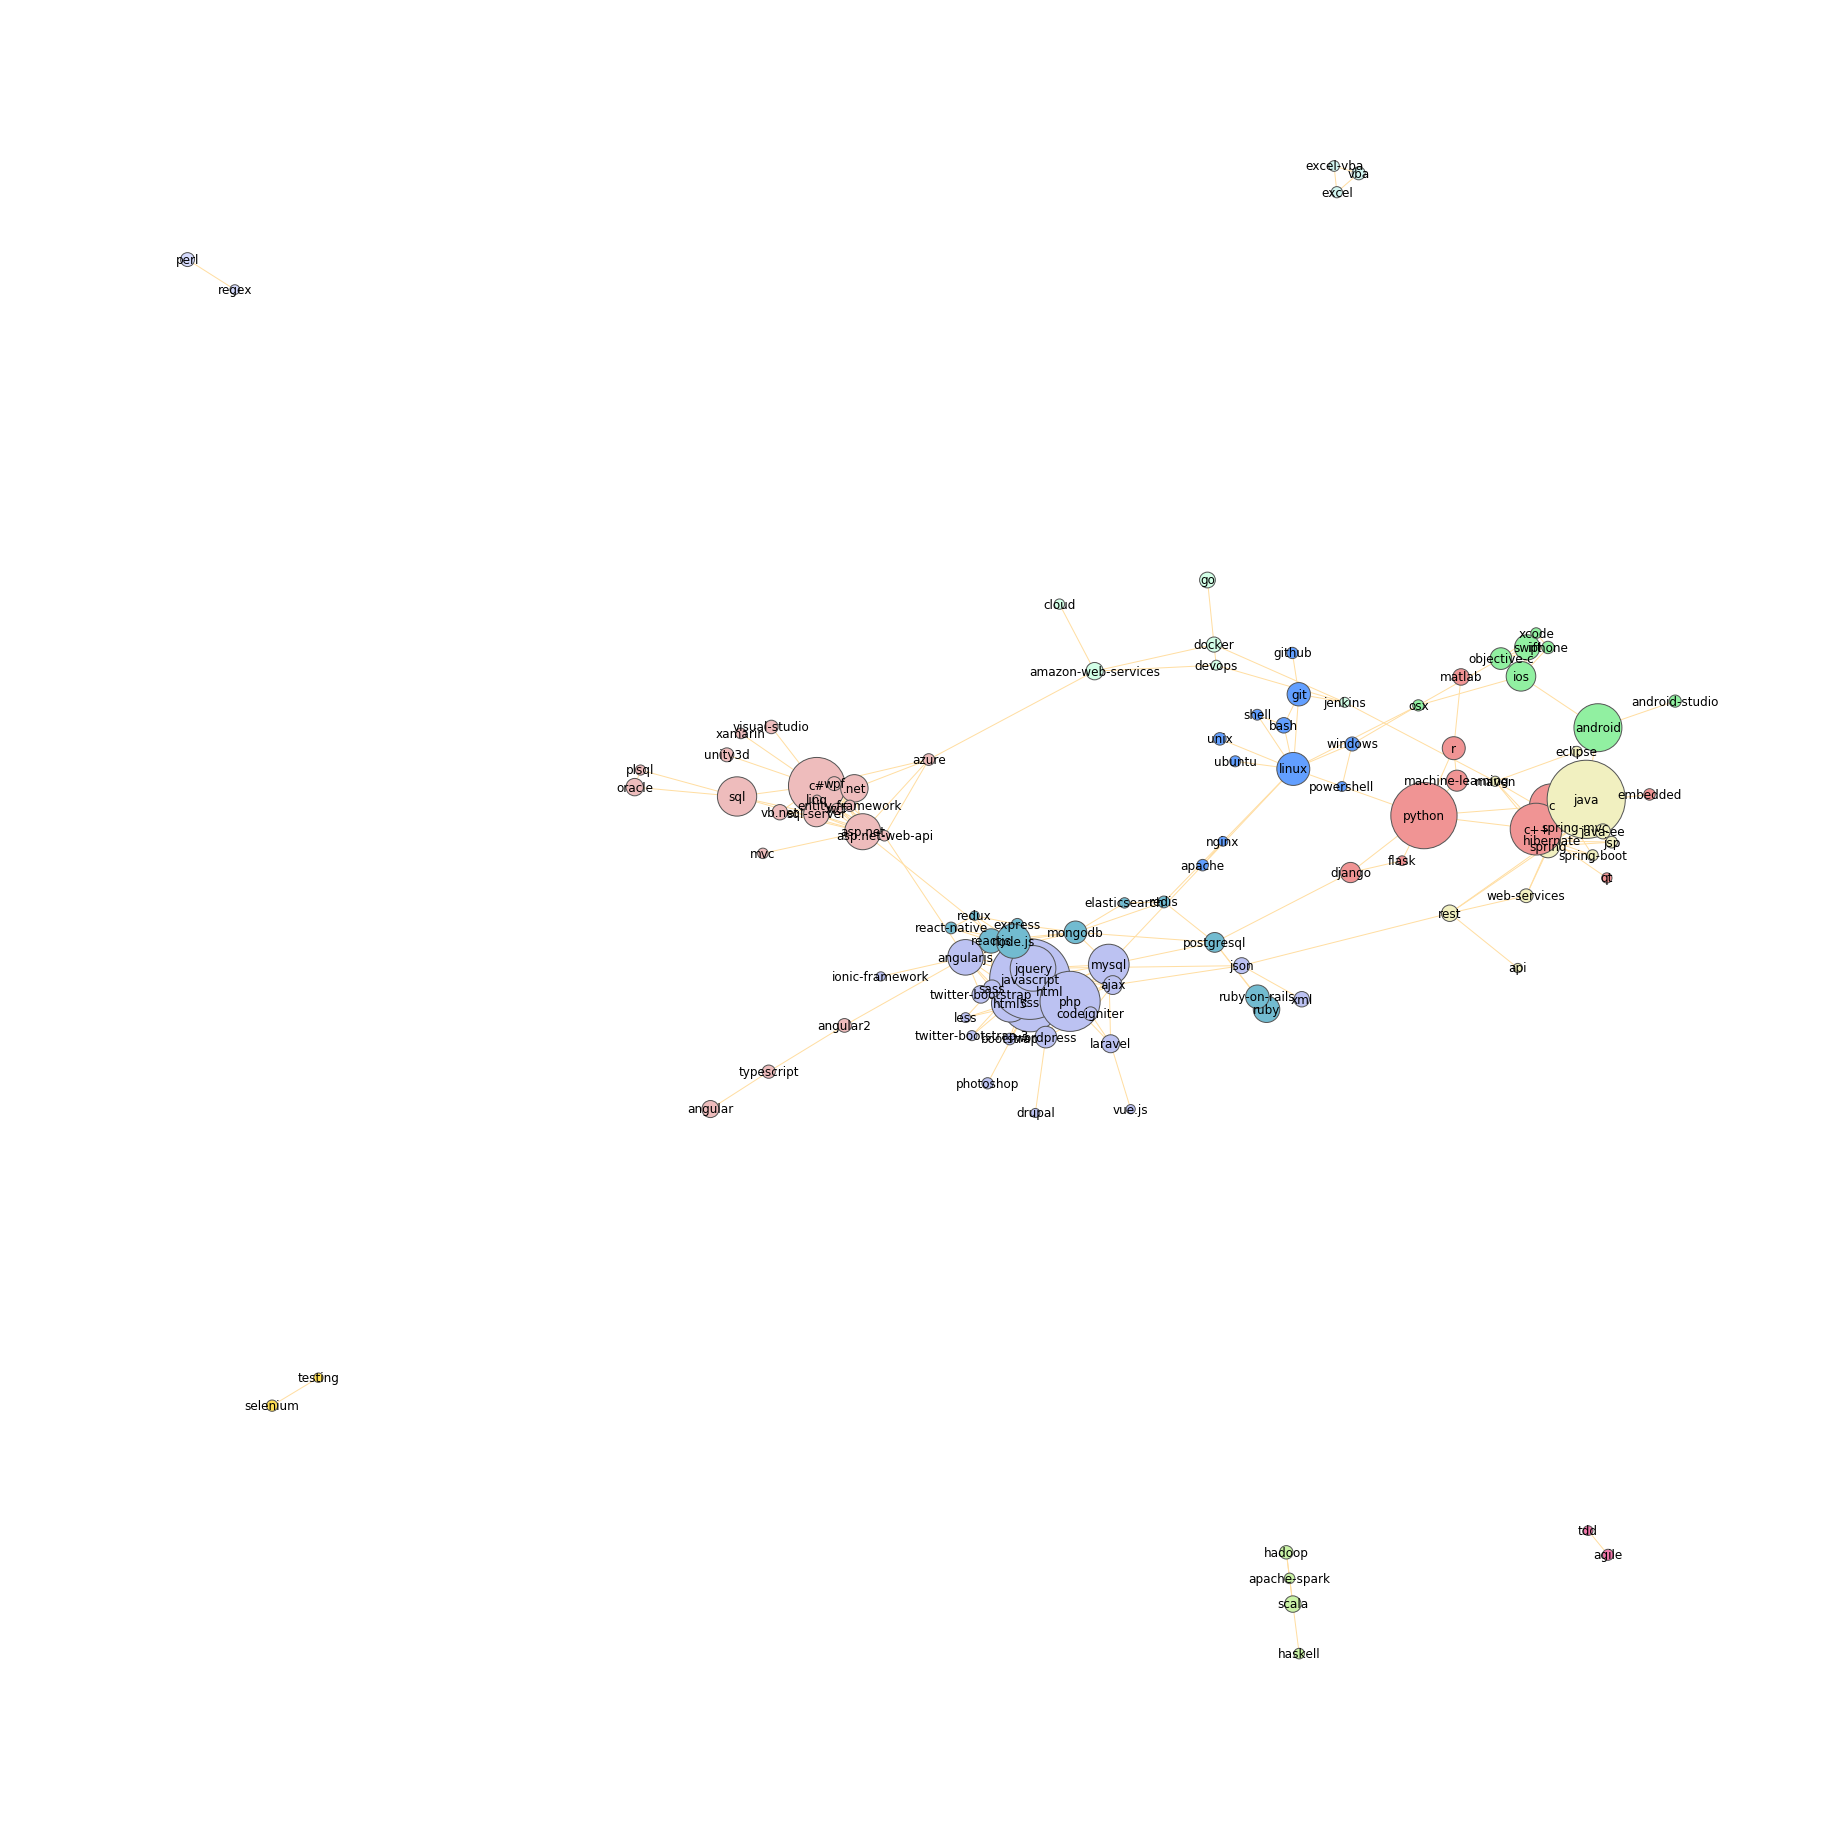

In [10]:
nx.draw(G, node_color=colors, node_size=size, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()